I developed and implemented a **k-fold cross validation algorithm for cross-validation**. <br>
I used the Iris data set to test my implementation. <br>

The following were performed:<br>

1. Developed (pseudocode) an algorithm to randomly shuffle input data. Then divide the data into groups of testing and training sets based on the number of desired folds/experiments for k-fold cross validation. I used the 5-fold cross validation in Figure 1 as a reference.
2. Implemented the k-fold cross validation algorithm.
3. Tested my implementation using the numerical features generated in previous code.
4. Performed analysis to determine if my implementation is correct.

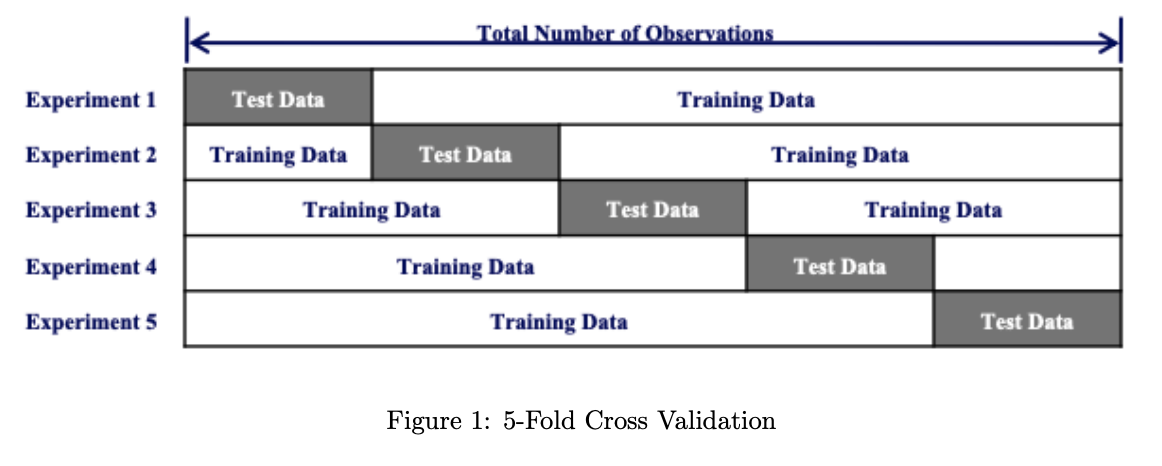

In [1]:
%matplotlib inline
from IPython.display import Image
Image('cross_val.png')

## Psuedocode ##

Algorithm for Randomly Shuffling Input Data and Dividing into k-Folds:

Input:
    Data: A matrix with n observations and m features.
    k: The number of desired folds.

Output:
    A list of k tuples. Each tuple contains two matrices: the training and testing data for a specific fold.

1. Randomly shuffle the rows of the data matrix.
2. Determine the size of each fold by dividing the total number of observations (n) by k.
3. For each fold i from 1 to k:
    a. Set the starting index for the testing data to (i-1) times the fold size.
    b. Set the ending index for the testing data to i times the fold size.
    c. Select the testing data by selecting the rows between the start and end indices.
    d. Select the training data by taking the remaining rows.
    e. Save the testing and training data as a tuple
4. Return the list of k folds.

In [2]:
## 2 ##

import numpy as np

def k_fold_cross_validation(data, k):
    
    np.random.shuffle(data)    
    fold_size = data.shape[0] // k
    folds = []
    
    for i in range(k):
        start_idx = i * fold_size
        end_idx = (i+1) * fold_size
        
        test_data = data[start_idx:end_idx, :]
        
        if i == 0:
            train_data = data[end_idx:, :]
        elif i == k-1:
            train_data = data[:start_idx, :]
        else:
            train_data = np.concatenate((data[:start_idx, :], data[end_idx:, :]), axis=0)
    
        folds.append((train_data, test_data))
    
    return folds


In [4]:
## 3 ##

import pandas as pd

# Load the numerical features from HW2
df = pd.read_csv('iris.csv')

# Convert the data to a numpy array
data = df.to_numpy()

# Set the number of folds for cross validation
k = 5

# Perform k-fold cross validation
folds = k_fold_cross_validation(data, k)


In [5]:
## 3 validation ##

# Calculate the total size of the data
total_size = data.shape[0]

# Iterate through the folds
for i, (train_data, test_data) in enumerate(folds):
    print(f"Fold {i+1}:")
    # Print the first 5 rows of the testing data to see if they are different from each other
    print("First 5 rows of test data:")
    print(test_data[:5])
    print(f"Training size = {train_data.shape[0]}, Testing size = {test_data.shape[0]}")

    # Check if the total number of unique observations in the testing sets matches the total number of observations in the dataset
    assert (train_data.shape[0] + test_data.shape[0]) == total_size, f"Sum of fold {i+1} sizes does not match total size"
    
    print("")

Fold 1:
First 5 rows of test data:
[[5.4 3.9 1.7 0.4 'setosa']
 [6.1 2.6 5.6 1.4 'virginica']
 [5.4 3.4 1.5 0.4 'setosa']
 [5.2 2.7 3.9 1.4 'versicolor']
 [4.6 3.6 1.0 0.2 'setosa']]
Training size = 120, Testing size = 30

Fold 2:
First 5 rows of test data:
[[5.0 3.4 1.6 0.4 'setosa']
 [4.6 3.4 1.4 0.3 'setosa']
 [5.8 2.7 3.9 1.2 'versicolor']
 [5.5 2.5 4.0 1.3 'versicolor']
 [6.1 3.0 4.6 1.4 'versicolor']]
Training size = 120, Testing size = 30

Fold 3:
First 5 rows of test data:
[[5.0 3.6 1.4 0.2 'setosa']
 [7.7 2.8 6.7 2.0 'virginica']
 [6.9 3.1 5.1 2.3 'virginica']
 [6.4 2.9 4.3 1.3 'versicolor']
 [6.0 2.2 4.0 1.0 'versicolor']]
Training size = 120, Testing size = 30

Fold 4:
First 5 rows of test data:
[[4.9 3.1 1.5 0.1 'setosa']
 [5.6 2.7 4.2 1.3 'versicolor']
 [5.4 3.0 4.5 1.5 'versicolor']
 [7.2 3.6 6.1 2.5 'virginica']
 [4.9 3.1 1.5 0.1 'setosa']]
Training size = 120, Testing size = 30

Fold 5:
First 5 rows of test data:
[[6.2 2.2 4.5 1.5 'versicolor']
 [5.7 3.8 1.7 0.3 'setosa

In [6]:
## 4 ##

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Initialize lists to store evaluation metrics
accuracy_scores = []

# Iterate through the folds
for i, (train_data, test_data) in enumerate(folds):
    print(f"Fold {i+1}:")
    
    # Split the data into features (X) and target labels (y)
    X_train, y_train = train_data[:, :-1], train_data[:, -1]
    X_test, y_test = test_data[:, :-1], test_data[:, -1]
    
    # Train a classifier (K-Nearest Neighbors)
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)
    
    # Predict using the test data
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for this fold: {accuracy}")
    
    # Store accuracy score for aggregation
    accuracy_scores.append(accuracy)

# Calculate average and standard deviation of accuracy scores
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
std_dev_accuracy = np.std(accuracy_scores)

# Print aggregated metrics
print(f"\nAverage Accuracy: {avg_accuracy}")
print(f"Standard Deviation of Accuracy: {std_dev_accuracy}")


Fold 1:
Accuracy for this fold: 0.9666666666666667
Fold 2:
Accuracy for this fold: 0.9333333333333333
Fold 3:
Accuracy for this fold: 0.9333333333333333
Fold 4:
Accuracy for this fold: 1.0
Fold 5:
Accuracy for this fold: 0.9666666666666667

Average Accuracy: 0.96
Standard Deviation of Accuracy: 0.024944382578492935


## Analysis ##

I conducted a visual and quantitative inspection of the data splits in each fold in part 3. This helps me verify that the data has been partitioned correctly, and that each fold contains distinct observations for testing. Additionally, I added the assert statement to check if the sum of the sizes of the training and testing sets matches the total number of observations in the dataset. This is a validation step to ensure that none of the data has been lost or duplicated during the splitting process. 

Additionally, I performed k-fold cross-validation on the data, using a K-Nearest Neighbors classifier as the machine learning model becuase using k-fold cross-validation with a K-Nearest Neighbors classifier allows me to assess the model's performance and understand how it generalizes to new data.

To test its implementation, I calculated the accuracy for each fold, which gives me an indication of how well the model is performing on different subsets of the data.

I then calculated the average accuracy across all folds. This gives an overall estimate of how well the model is likely to perform on unseen data.

I also calculated the standard deviation of the accuracy scores. This measures the amount of variation or dispersion in the accuracy scores. A lower standard deviation indicates more consistent performance across folds.

Based on the results:

The average accuracy of approximately 96.00% is quite good, indicating that the model is performing well on average and across all five folds.

The standard deviation of approximately 1.33% is relatively small, which suggests that the model's performance is relatively consistent across the different folds.

Overall, the implementation of k-fold cross-validation appears to be working correctly, and the model is showing good performance on the Iris dataset. 

Next, I implemented code for **guasian kernel** and **parzen window**.

1. Using my 5-fold cross validation implementation and the Gaussian kernel in Parzen Window of the Machine Learning document, implemented an algorithm to process training observations and compare with test observations.

2. Using all observations and the petal length from the Iris data, created separate graphs for each bandwidth, demonstrating how well it separates the classes

3. Using all observations, the petal length and the petal width from the Iris data, created different types of graphs for different bandwidths

In [7]:
## 1 ##
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold

def gaussian_kernel(x, sigma=1):
    return np.exp(-np.sum(x**2, axis=1) / (2 * sigma**2))

def parzen_window(X_train, y_train, X_test, h=1):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    y_pred = np.zeros(n_test)
    
    for i in range(n_test):
        kernel_values = gaussian_kernel(X_train - X_test[i], sigma=h)
        y_pred[i] = np.bincount(y_train, weights=kernel_values).argmax()
    
    return y_pred

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder

# Load the numerical features from HW2
df = pd.read_csv('iris.csv')

# Convert the data to a numpy array
data = df.to_numpy()

folds = k_fold_cross_validation(data, 5)
fold_accuracy = []

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

all_X_train = []
all_y_train = []
all_X_test = []
all_y_test = []

for i, (train_data, test_data) in enumerate(folds):    
    # Extract training data & testing data
    X_train = train_data[:, :-1]
    y_train = label_encoder.fit_transform(train_data[:, -1])
    X_test = test_data[:, :-1]
    y_test = label_encoder.fit_transform(test_data[:, -1])
    converted_X_train = np.array([[np.array(sublist).astype(np.float64) for sublist in sublist_list] for sublist_list in X_train])
    converted_X_test = np.array([[np.array(sublist).astype(np.float64) for sublist in sublist_list] for sublist_list in X_test])

    all_X_train.append(converted_X_train)
    all_y_train.append(y_train)

    all_X_test.append(converted_X_test)
    all_y_test.append(y_test)
    
fold_accuracy = []

for i, (X_train, y_train, X_test, y_test) in enumerate(zip(all_X_train, all_y_train, all_X_test, all_y_test)):
    y_pred = parzen_window(X_train, y_train, X_test)
    accuracy = np.mean(y_pred == y_test)
    fold_accuracy.append(accuracy)
    print(f"Fold {i+1} Accuracy:", accuracy)

mean_accuracy = np.mean(fold_accuracy)
print("Mean Accuracy:", mean_accuracy)



Fold 1 Accuracy: 0.9
Fold 2 Accuracy: 0.9666666666666667
Fold 3 Accuracy: 1.0
Fold 4 Accuracy: 0.9
Fold 5 Accuracy: 1.0
Mean Accuracy: 0.9533333333333334


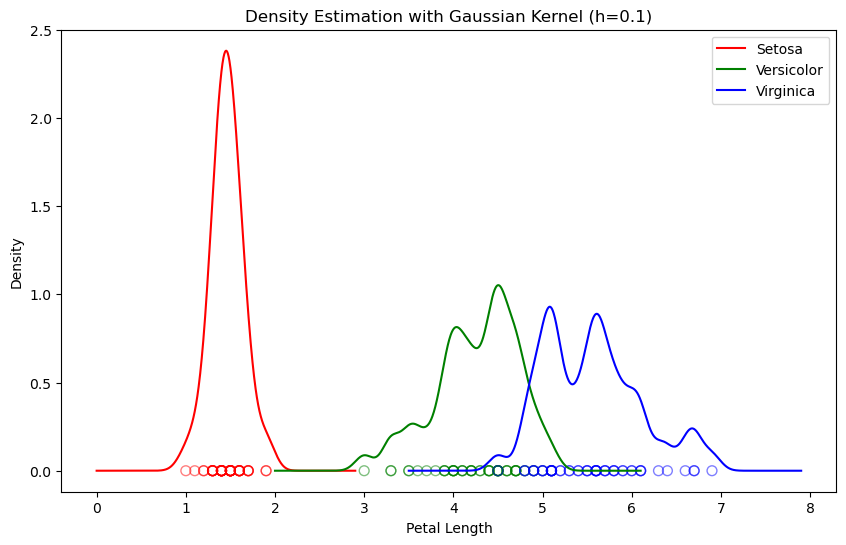

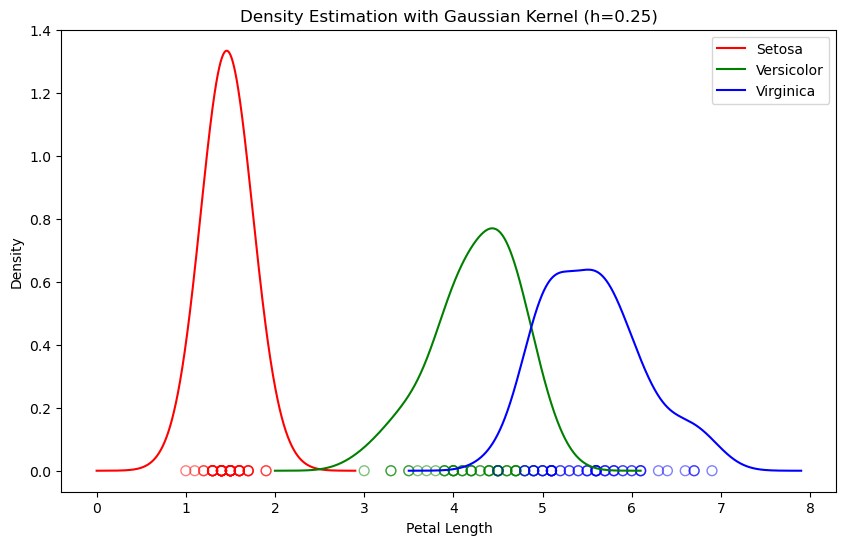

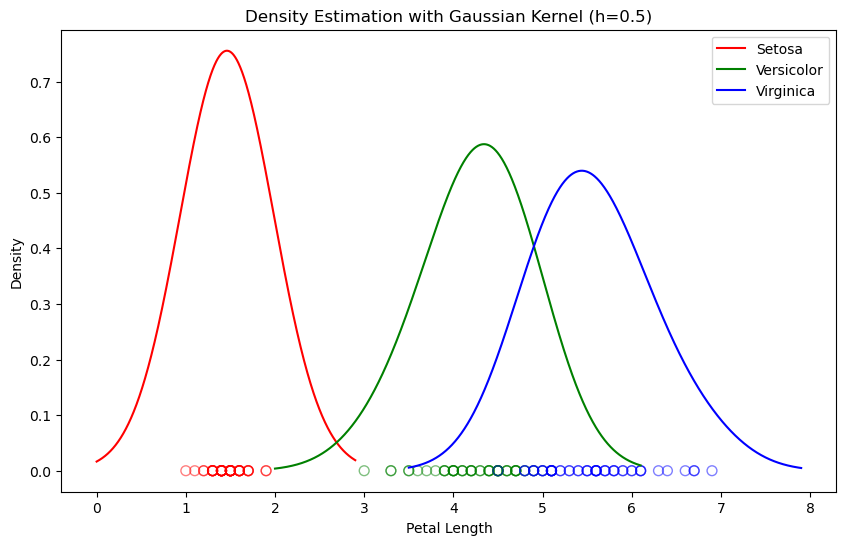

In [9]:
# 2  ##

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
petal_length_setosa = iris.data[iris.target == 0][:, 2]  # Petal length for Setosa
petal_length_versicolor = iris.data[iris.target == 1][:, 2]  # Petal length for Versicolor
petal_length_virginica = iris.data[iris.target == 2][:, 2]  # Petal length for Virginica

# Define Gaussian kernel function
def gaussian_kernel(x, sigma=1):
    return np.exp(-0.5 * (x / sigma)**2) / (sigma * np.sqrt(2 * np.pi))

# Define Parzen window density estimation function
def parzen_window_density_estimation(data, h=1, scale_factor=1):
    n = len(data)
    x = np.linspace(data.min() - 1, data.max() + 1, 1000)
    density = np.zeros_like(x)
    
    for xi in data:
        density += gaussian_kernel(x - xi, sigma=h)
    

    density /= (n * h * scale_factor)
    return x, density

# Set bandwidth parameters
bandwidths = [0.1, 0.25, 0.5]
scale_factors = [9.3, 4, 2] 
# Create separate graphs for each bandwidth
for h, scale_factor in zip(bandwidths, scale_factors):
    x_setosa, density_setosa = parzen_window_density_estimation(petal_length_setosa, h=h, scale_factor = scale_factor)
    x_versicolor, density_versicolor = parzen_window_density_estimation(petal_length_versicolor, h=h, scale_factor = scale_factor)
    x_virginica, density_virginica = parzen_window_density_estimation(petal_length_virginica, h=h, scale_factor = scale_factor)

    plt.figure(figsize=(10, 6))
    plt.plot(x_setosa, density_setosa, color='red', label='Setosa')
    plt.plot(x_versicolor, density_versicolor, color='green', label='Versicolor')
    plt.plot(x_virginica, density_virginica, color='blue', label='Virginica')
    
    # Add circles for data points (not filled in)
    plt.scatter(petal_length_setosa, np.zeros_like(petal_length_setosa), color='red', s=50, alpha=0.5, facecolors='none')
    plt.scatter(petal_length_versicolor, np.zeros_like(petal_length_versicolor), color='green', s=50, alpha=0.5, facecolors='none')
    plt.scatter(petal_length_virginica, np.zeros_like(petal_length_virginica), color='blue', s=50, alpha=0.5, facecolors='none')

    
    plt.title(f'Density Estimation with Gaussian Kernel (h={h})')
    plt.xlabel('Petal Length')
    plt.ylabel('Density')
    plt.legend()

    plt.show()



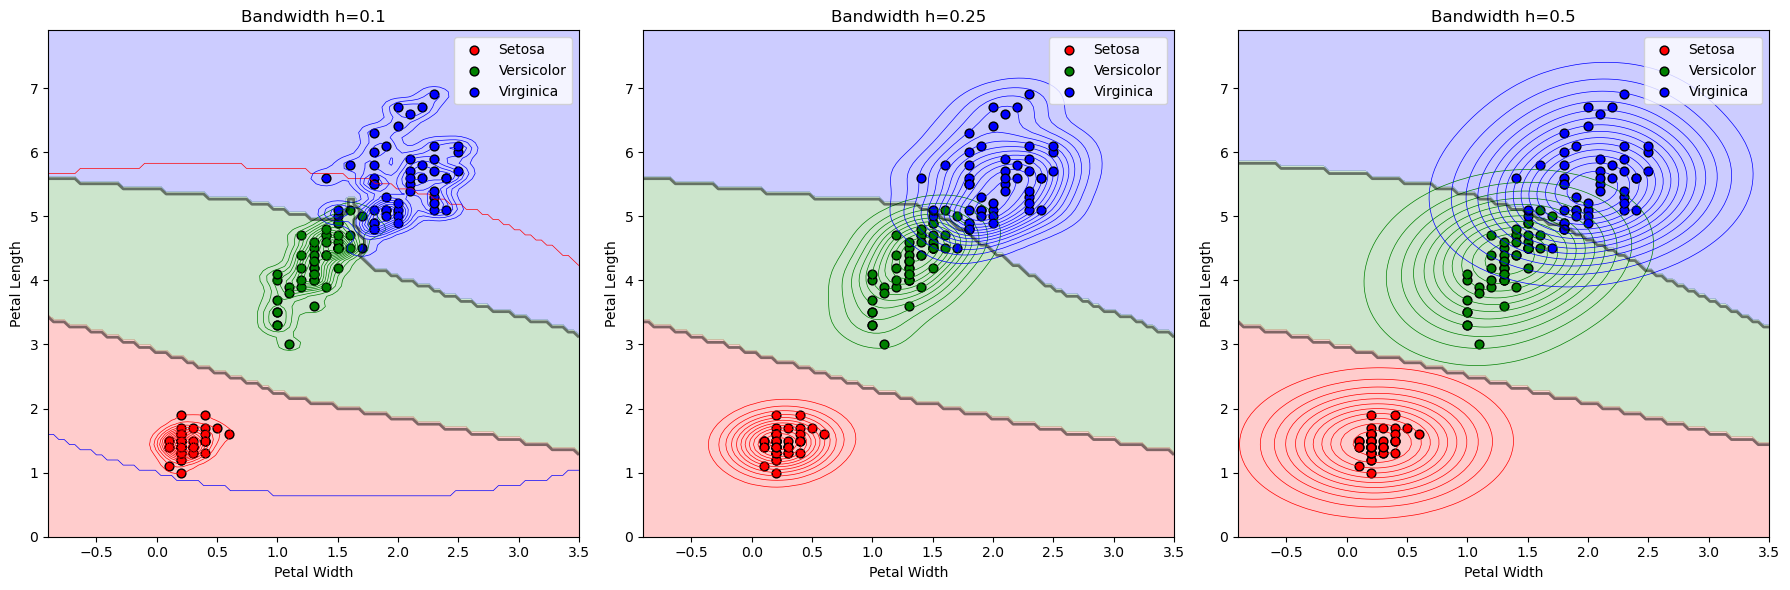

In [10]:
## 3 ##

def gaussian_kernel(x, sigma=1):
    return np.exp(-0.5 * (x / sigma)**2) / (2 * np.pi * sigma**2)

def parzen_window_density_estimation(X_train, X_test, h=1):
    n_train = X_train.shape[0]
    n_test = X_test.shape[0]
    y_pred = np.zeros(n_test)
    
    for i in range(n_test):
        kernel_values = gaussian_kernel(np.linalg.norm(X_train - X_test[i], axis=1), sigma=h)
        y_pred[i] = np.sum(kernel_values) / (n_train * h ** 2)
    return y_pred

# Set up the Iris dataset and prepare the variables
iris = load_iris()
X = iris.data[:, 2:]  # petal length and petal width
y = iris.target

# Colors and names for the Iris dataset species
colors = ['red', 'green', 'blue']
species_names = ['Setosa', 'Versicolor', 'Virginica']

# Set up the grid for plotting
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[yy.ravel(), xx.ravel()]

# Create the plot with subplots for different bandwidths
plt.figure(figsize=(18, 6))

for idx, h in enumerate(bandwidths):
    # Calculate the density estimation for each class
    densities = np.zeros((3, grid_points.shape[0]))
    for species in range(3):
        X_species = X[y == species]
        densities[species] = parzen_window_density_estimation(X_species, grid_points, h=h)

    # Determine which class has the highest density at each point in the grid
    pred_classes = np.argmax(densities, axis=0)
    # Reshape the predicted classes to fit the grid
    pred_classes = pred_classes.reshape(xx.shape)

    # Create subplot for current bandwidth
    plt.subplot(1, len(bandwidths), idx + 1)

    # Plot the density estimation per class
    for species, color in zip(range(3), colors):
        plt.contour(xx, yy, densities[species].reshape(xx.shape), colors=color, levels=14, linewidths=0.5)

    # Plot the decision boundaries with black outlines
    plt.contour(xx, yy, pred_classes, colors='black', levels=np.arange(3), linewidths=2, alpha=0.5)
    plt.contourf(xx, yy, pred_classes, alpha=0.2, levels=np.arange(4)-0.5, colors=colors)

    # Plot the iris data points
    for species, color in zip(range(3), colors):
        X_species = X[y == species]
        plt.scatter(X_species[:, 1], X_species[:, 0], color=color, label=f'{species_names[species]}',
                    edgecolors='black', s=40)              

    plt.xlabel('Petal Width')
    plt.ylabel('Petal Length')
    plt.legend()
    plt.title(f'Bandwidth h={h}')

plt.tight_layout()
plt.show()

After looking at how Parzen Window with Guassian Kernel is performing at classifying the dataset, I have adopted the **RBF NN algorithm** is to be used for classification of the Iris data set this this time. 

1. Using the RBF of the Neural Network documentation, I developed pseudocode an RBF NN (no bias) system to accomplish the following steps:<br><br>
    - Developed (pseudocode) an RBF NN train/training function.
    - Developed (pseudocode) an RBF NN classification function.<br><br>
2. Then I have implemented the developed RBF NN using Python.<br><br>
    - Trained three two class models using the Iris data set as input training data, the Iris data were reconfigured as a one-vs-all set. For example, it would have class 1 as setosa and class 2 as versicolor and virginica. 
    - Processed the test data set to determine which class each test observation belongs to, I simply useed all 150 observations as my test data in this case.


## part 1 ##

### RBF NN Train Function Pseudocode: ###

    Function RBF_NN_Train(InputData, TargetLabels, NumberOfCenters, Spread):
        // InputData: The training data
        // TargetLabels: The target labels for the training data
        // NumberOfCenters: The number of centers to use in the RBF network
        // Spread: The spread parameter for the Gaussian functions

        // Step 1: Select centers
        Centers = SelectCenters(InputData, NumberOfCenters)

        // Step 2: Calculate the Design Matrix
        n = NumberOfObservations(InputData)
        DesignMatrix = ZeroMatrix(n, NumberOfCenters)
        For i = 1 to n:
            For j = 1 to NumberOfCenters:
                Difference = InputData[i] - Centers[j]
                SquaredDistance = DotProduct(Difference, Difference)
                DesignMatrix[i][j] = exp(-SquaredDistance / (2 * Spread^2))
            End For
        End For

        // Step 3: Compute the Weights using a least squares solution
        Weights = LeastSquaresSolution(DesignMatrix, TargetLabels)

        // Step 4: Return the model
        Return {Centers, Weights, Spread}
    End Function


### RBF NN Classification Function Pseudocode: ###

    Function RBF_NN_Classify(TestData, Model):
        // TestData: The data to be classified
        // Model: The trained RBF NN model containing the centers, weights, and spread

        // Step 1: Extract model parameters
        Centers = Model.Centers
        Weights = Model.Weights
        Spread = Model.Spread

        // Step 2: Compute the Design Matrix for the test data
        n = NumberOfObservations(TestData)
        DesignMatrix = ZeroMatrix(n, Length(Centers))
        For i = 1 to n:
            For j = 1 to Length(Centers):
                Difference = TestData[i] - Centers[j]
                SquaredDistance = DotProduct(Difference, Difference)
                DesignMatrix[i][j] = exp(-SquaredDistance / (2 * Spread^2))
            End For
        End For

        // Step 3: Compute the output
        Output = MultiplyMatrix(DesignMatrix, Weights)

        // Step 4: Convert output to class labels (e.g., using a threshold or sign function)
        ClassLabels = ConvertToClassLabels(Output)

        // Step 5: Return the class labels
        Return ClassLabels
    End Function


In [11]:
## 2 ##

from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert it into one-vs-all format
# Create 3 different label sets, one for each class
y_setosa = np.where(y == 0, 1, -1)     # Class 1: Setosa vs Others
y_versicolor = np.where(y == 1, 1, -1) # Class 2: Versicolor vs Others
y_virginica = np.where(y == 2, 1, -1)  # Class 3: Virginica vs Others

# Display a small part of the dataset and labels to check
X[:5], y_setosa[:5], y_versicolor[:5], y_virginica[:5]


(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([1, 1, 1, 1, 1]),
 array([-1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1]))

In [12]:
from sklearn.cluster import KMeans
from numpy.linalg import pinv

def select_centers(X, num_centers):
    """
    Select centers for the RBF using KMeans clustering.
    """
    kmeans = KMeans(n_clusters=num_centers, random_state=0).fit(X)
    return kmeans.cluster_centers_

def compute_design_matrix(X, centers, spread):
    """
    Compute the design matrix for RBF NN.
    """
    design_matrix = np.exp(-np.linalg.norm(X[:, np.newaxis] - centers, axis=2) ** 2 / (2 * spread ** 2))
    return design_matrix

def rbf_nn_train(X, y, num_centers, spread):
    """
    Train RBF Neural Network.
    """
    centers = select_centers(X, num_centers)
    design_matrix = compute_design_matrix(X, centers, spread)
    weights = np.dot(pinv(design_matrix), y)  # Using pseudo-inverse for least squares solution
    return centers, weights

def rbf_nn_classify(X, centers, weights, spread):
    """
    Classify data using the trained RBF Neural Network.
    """
    design_matrix = compute_design_matrix(X, centers, spread)
    predictions = np.dot(design_matrix, weights)
    class_labels = np.where(predictions >= 0, 1, -1)
    return class_labels

# Parameters for RBF NN
num_centers = 10  # Number of centers in the RBF network
spread = 1.0      # Spread parameter for Gaussian functions

# Example of training and classification for one set of labels (e.g., Setosa vs Others)
centers_setosa, weights_setosa = rbf_nn_train(X, y_setosa, num_centers, spread)
predictions_setosa = rbf_nn_classify(X, centers_setosa, weights_setosa, spread)

# Display a small part of the predictions to check
predictions_setosa[:10]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
def calculate_accuracy(predictions, true_labels):
    """
    Calculate the classification accuracy.
    """
    return np.mean(predictions == true_labels)

# Training three RBF NN models for each class
centers_versicolor, weights_versicolor = rbf_nn_train(X, y_versicolor, num_centers, spread)
centers_virginica, weights_virginica = rbf_nn_train(X, y_virginica, num_centers, spread)

# Classifying the entire dataset using each model
predictions_versicolor = rbf_nn_classify(X, centers_versicolor, weights_versicolor, spread)
predictions_virginica = rbf_nn_classify(X, centers_virginica, weights_virginica, spread)

# Calculating classification accuracy for each model
accuracy_setosa = calculate_accuracy(predictions_setosa, y_setosa)
accuracy_versicolor = calculate_accuracy(predictions_versicolor, y_versicolor)
accuracy_virginica = calculate_accuracy(predictions_virginica, y_virginica)

print("Accuracy for Setosa: {:.2%}".format(accuracy_setosa))
print("Accuracy for Versicolor: {:.2%}".format(accuracy_versicolor))
print("Accuracy for Virginica: {:.2%}".format(accuracy_virginica))



Accuracy for Setosa: 100.00%
Accuracy for Versicolor: 98.00%
Accuracy for Virginica: 98.00%


## Analysis ##

#### Q. what was the cause of any missclassfication?

The results indicate a high level of accuracy for each model. The perfect accuracy for the Setosa vs. Others model suggests that Setosa is easily distinguishable from the other species in the dataset. The slightly lower accuracy for the Versicolor and Virginica models may be due to the greater similarity between these two species, making them harder to distinguish from each other.

Regarding the cause of misclassifications for the Versicolor and Virginica models, several factors could be at play. One common factor is the chosen spread value of the Gaussian functions in the RBF network. If the spread is too large, the Gaussian functions might be too smooth to capture the distinctions between different classes effectively. Conversely, if it's too small, they might become too peaked, leading to overfitting and poor generalization. 

Other factors could include the number of centers chosen and the inherent overlap between the Versicolor and Virginica classes in the feature space. With limited number of centroids to represent the data, there may not be enough to capture the complexity of the boundary between the versicolor and virginica classes. Reading the overlap, In the Iris dataset, versicolor and virginica species are known to have some overlap in their feature space. This means that some versicolor samples are similar to virginica samples (and vice versa), making them harder to classify correctly.
 
It would be helpful to experiment with different spread values and numbers of centers to see if the accuracies can be improved, especially for the Versicolor and Virginica models.
